# Workshop Inteligência Artificial na prática para iniciantes

## Escola Britânica de Artes Criativas & Tecnologia 

## Dias 6, 7 e 8 de Julho às 19h

## Etapa 1 - O Problema 

### Sempre começa com um questionamento!

### Os dados são importantes para gerar insights que nos ajudam a entender o que eles querem dizer e consequentemente, ter decisões cada vez melhores.

## Entendendo o Problema:

### Uma Startup de Vendas deseja uma análise dos dados de anúncios patrocinados no Facebook.

## Objetivos do Projeto:

#### Compreender o interesse do Público.

#### Melhorar a conversão de vendas a partir da análise de campanhas realizadas no Facebook. 


## Etapa 2: Coleta de Dados

#### Você pode baixar para visualizar o conjunto de dados que estou utilizando no site:
https://www.kaggle.com/loveall/clicks-conversion-tracking

## Etapa 3: Análise, Interpretação e Visualização dos Dados 

#### Importando as bibliotecas

In [118]:
#Manipulação dos dados
import pandas as pd

#Visualização
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Carregando os dados



In [2]:
dt = pd.read_csv("KAG_conversion_data.csv")

In [3]:
type(dt)

pandas.core.frame.DataFrame

#### Primeira Inspeção

In [4]:
dt.head() #Lista por default as 5 primeiras linhas

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
dt.tail()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2


In [6]:
dt.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [7]:
dt.index

RangeIndex(start=0, stop=1143, step=1)

In [8]:
dt.shape

(1143, 11)

In [9]:
linhas, colunas = dt.shape

In [10]:
print(f"O número de linhas e {linhas}")

O número de linhas e 1143


In [11]:
type(dt)

pandas.core.frame.DataFrame

In [12]:
ser_interest = dt["interest"]

In [13]:
type(ser_interest)

pandas.core.series.Series

In [14]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


#### Dicionário dos dados



1.   ad_id - ID único para cada anúncio
2.   xyzcampaignid - ID associado a cada campanha publicitária da empresa XYZ
3.   fbcampaignid - ID associado a como o Facebook rastreia cada campanha.
4.   age - idade da pessoa a quem o anúncio é mostrado.
5.   gender - sexo da pessoa que deseja que o anúncio seja mostrado
6.   interest - código que especifica a categoria à qual pertence o interesse da pessoa (os interesses são mencionados no perfil público da pessoa no Facebook)
7.   Impression - o número de vezes que o anúncio foi mostrado.
8.   Clicks - número de cliques nesse anúncio.
9.   Spent - Valor pago pela empresa xyz ao Facebook, para exibir aquele anúncio.
10.  Total conversion - Número total de pessoas que fizeram perguntas sobre o produto depois de ver o anúncio.
11.  Approved conversion - Número total de pessoas que compraram o produto depois de ver o anúncio.

In [15]:
dt.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
df.rename(columns = {'ad_id': 'id_anuncio', 'xyz_campaign_id': 'id_campanha', 'fb_campaign_id': 'id_fb_campanha',
                     'age': 'idade', 'gender': 'genero', 'interest': 'interesse', 'Impressions': 'numero_exibicoes',
                     'Clicks': 'cliques_anuncio', 'Spent': 'valorpago_anuncio', 'Total_Conversion': 'conversao',
                     'Approved_Conversion': 'compras'}, inplace = True)

In [24]:
dt.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_anuncio,valorpago_anuncio,conversao,compras
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [26]:
dt.columns

Index(['id_anuncio', 'id_campanha', 'id_fb_campanha', 'idade', 'genero',
       'interesse', 'numero_exibicoes', 'cliques_anuncio', 'valorpago_anuncio',
       'conversao', 'compras'],
      dtype='object')

#### Informações Estatísticas

In [27]:
dt.describe()

,id_anuncio,id_campanha,id_fb_campanha,interesse,numero_exibicoes,cliques_anuncio,valorpago_anuncio,conversao,compras
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [28]:
dt.describe(include="all")

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_anuncio,valorpago_anuncio,conversao,compras
count,1.143000e+03,1143.000000,1143.000000,1143,1143,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
unique,NaN,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,30-34,M,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,426,592,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.872611e+05,1067.382327,133783.989501,NaN,NaN,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,NaN,NaN,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,NaN,NaN,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,NaN,NaN,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,NaN,NaN,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,NaN,NaN,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000


#### Dados Faltantes

In [30]:
dt.isnull().sum()

id_anuncio           0
id_campanha          0
id_fb_campanha       0
idade                0
genero               0
interesse            0
numero_exibicoes     0
cliques_anuncio      0
valorpago_anuncio    0
conversao            0
compras              0
dtype: int64

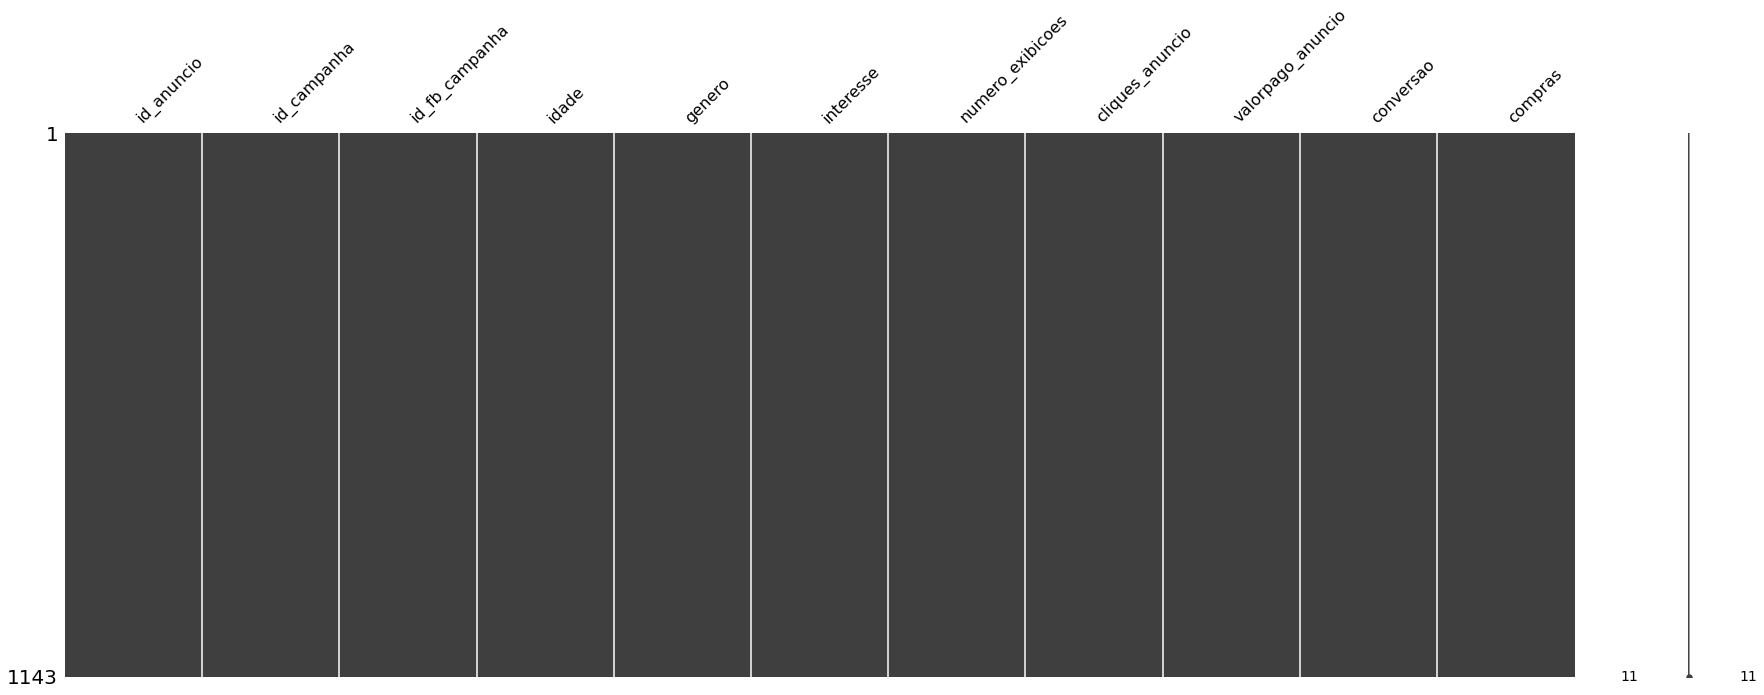

In [36]:
missingno.matrix(dt, figsize=(30,10))

#### Outliers

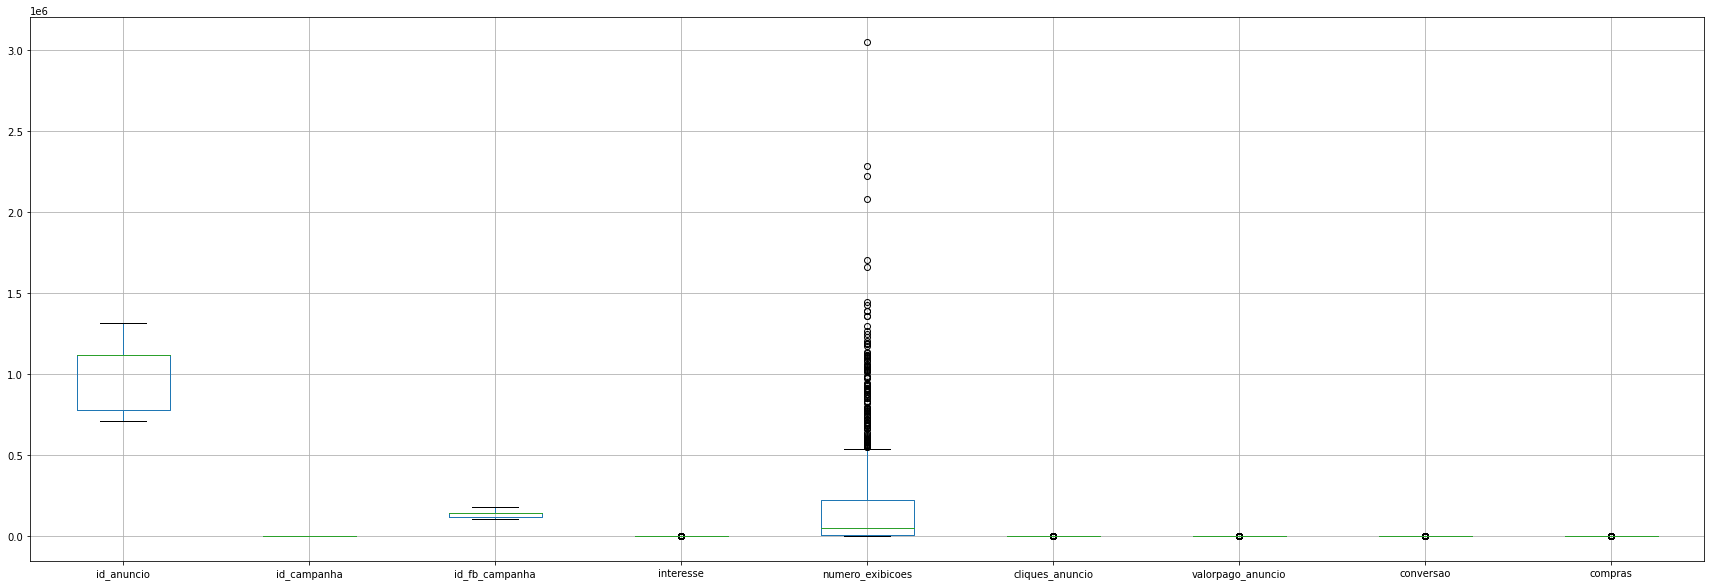

In [47]:
plt.figure(figsize=(30,10))
dt.boxplot()
plt.show()

#### Duplicatas

In [48]:
dt.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

In [49]:
dt[dt.duplicated()]

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_anuncio,valorpago_anuncio,conversao,compras


#### Matriz Correlação

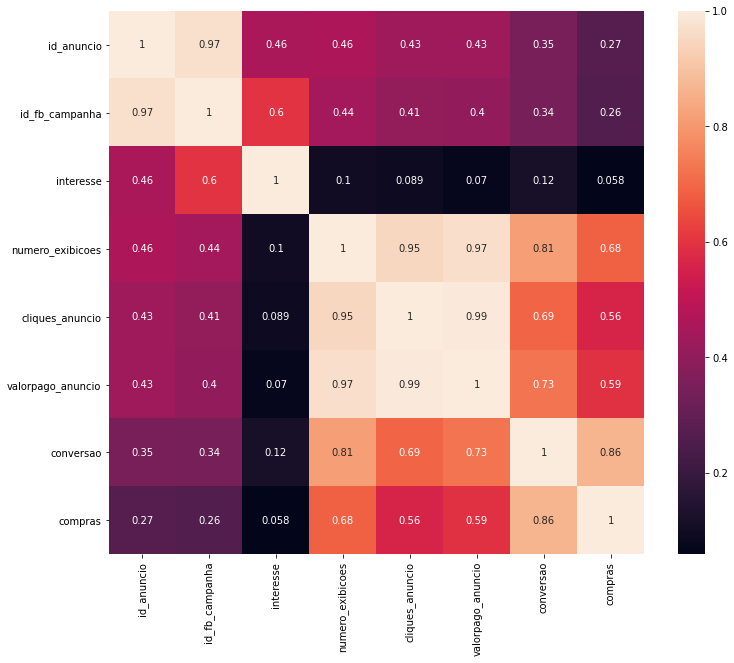

In [81]:
plt.figure(figsize=(12,10))
matrix_corr= dt.corr()
sns.heatmap(matrix_corr, annot=True)
sns.color_palette("flare", as_cmap=True)
plt.show()

#### Avaliando as Features (Colunas)

##### id_campanha - ID associado a cada campanha publicitária da empresa XYZ

In [51]:
dt["id_campanha"].nunique()

3

In [52]:
dt["id_campanha"].unique()

array([ 916,  936, 1178])

In [56]:
dt["id_campanha"].replace({916:"campanha-1", 936:"campanha-2", 1178:"campanha-3"}, inplace=True)

In [55]:
dt.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_anuncio,valorpago_anuncio,conversao,compras
0,708746,campanha-1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campanha-1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campanha-1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campanha-1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campanha-1,103928,30-34,M,28,4133,1,1.29,1,1


In [57]:
dt.tail()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_anuncio,valorpago_anuncio,conversao,compras
1138,1314410,campanha-3,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,campanha-3,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,campanha-3,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,campanha-3,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,campanha-3,179982,45-49,F,114,513161,114,165.609999,5,2


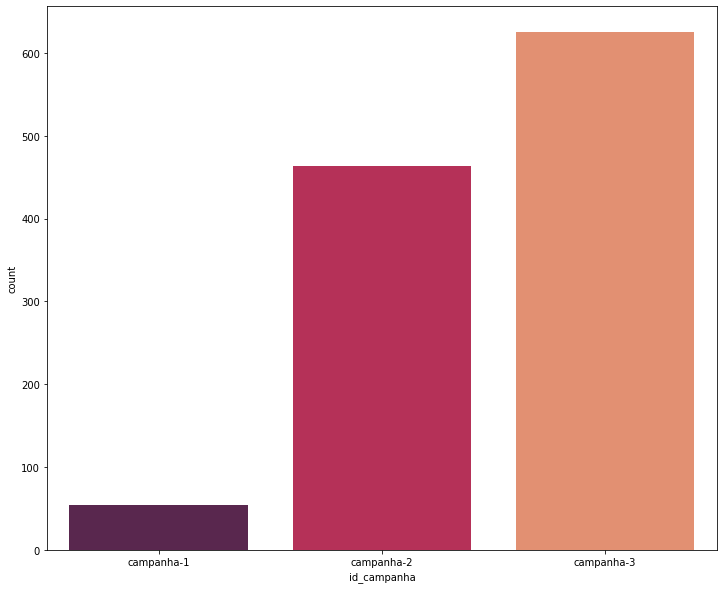

In [83]:
plt.figure(figsize=(12,10))
sns.countplot(x="id_campanha", data=dt, palette="rocket")
plt.show()

Sabemos agora que a campanha-3 é a campanha de marketing com maior numero de anúncios

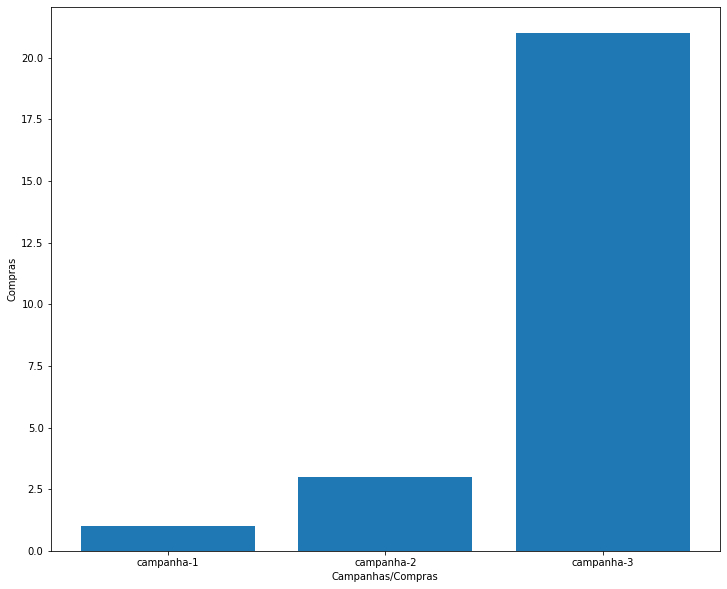

In [96]:
plt.figure(figsize=(12,10))
plt.bar(dt["id_campanha"], dt["compras"])
plt.ylabel("Compras")
plt.xlabel("Campanhas/Compras")
plt.show()

Vamos entender como a coluna de interesses está interferindo nessas compras<br><br>
*Vincularemos alguns dados para após isso começar a regressão linear*


##### Idade - Idade das pessoas a quem os anúncio são mostrados.

In [86]:
dt["idade"].nunique()

4

In [87]:
dt["idade"].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

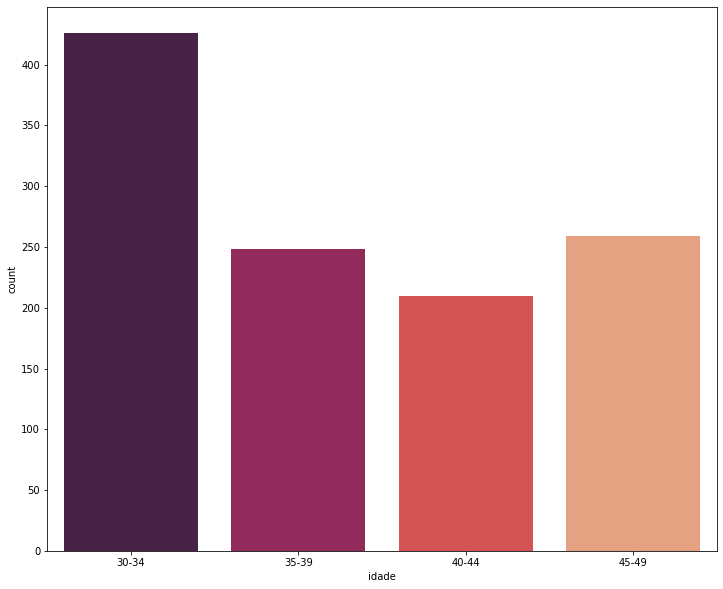

In [88]:
plt.figure(figsize=(12,10))
sns.countplot(x="idade", data=dt, palette="rocket")
plt.xlabel("Idade")
plt.show()

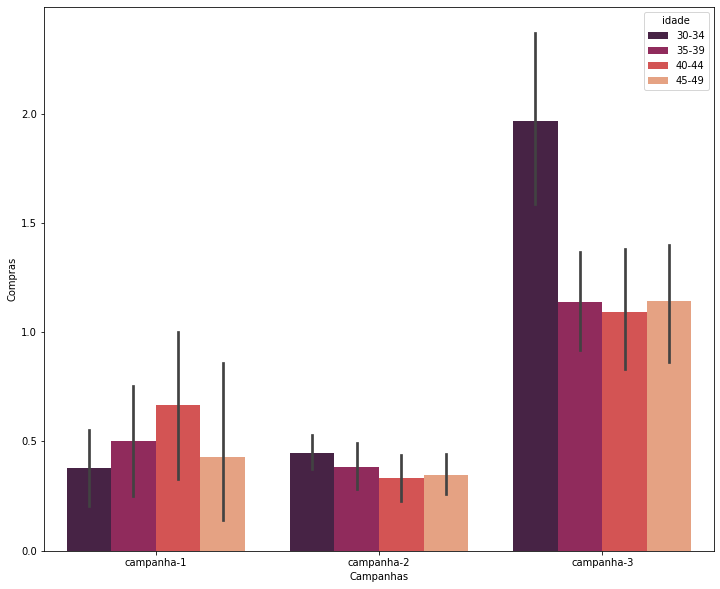

In [92]:
plt.figure(figsize=(12,10))
tips = sns.load_dataset("tips")
sns.barplot(x=dt["id_campanha"], y=dt["compras"], hue=dt["idade"], data=tips, palette="rocket")
plt.ylabel("Compras")
plt.xlabel("Campanhas")
plt.show()

Constatamos que:

Tanto na campanha-3, como na campanha-2 o grupo de 30-34 anos demonstrou mais interesse

Enquanto na campanha-1 o grupo de 40-44 anos demonstrou mais interesse

##### Gênero - Sexo da pessoa que deseja que o anúncio seja mostrado

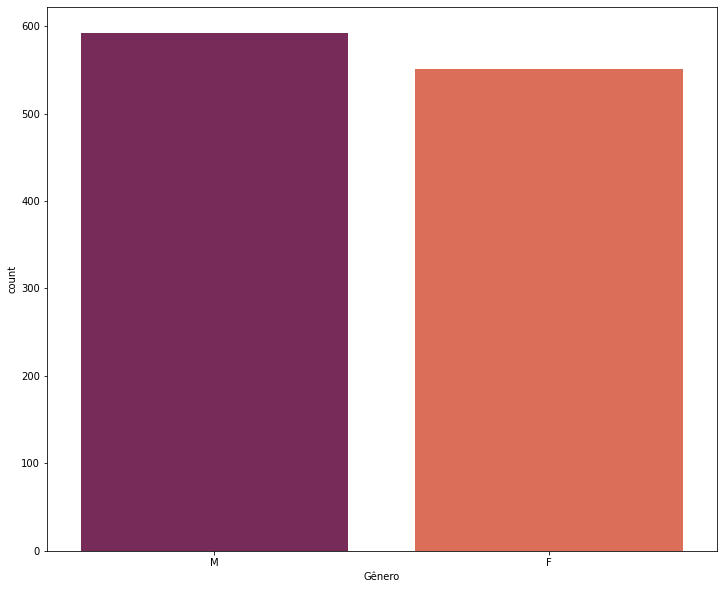

In [93]:
plt.figure(figsize=(12,10))
sns.countplot(x= "genero", data=dt, palette="rocket")
plt.xlabel("Gênero")
plt.show()

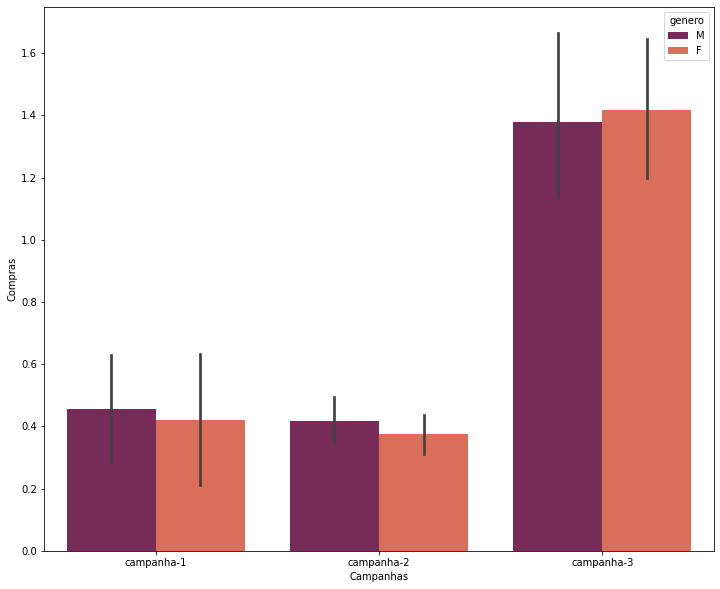

In [95]:
plt.figure(figsize=(12,10))
tips = sns.load_dataset("tips")
sns.barplot(x=dt["id_campanha"], y=dt["compras"], hue=dt["genero"], data=tips, palette="rocket")
plt.ylabel("Compras")
plt.xlabel("Campanhas")
plt.show()

Constatamos que:

Na campanha-3, o gênero feminino demonstrou mais interesse

Enquanto na campanha_1 e na campanha-2, o gênero masculino demonstrou mais interesse

## Etapa 4: Modelagem/Machine Learning

In [97]:
 dt.shape

(1143, 11)

In [99]:
amostra_dt = dt.sample(n=20)

In [100]:
amostra_dt.shape

(20, 11)

In [135]:
amostra_dt.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_anuncio,valorpago_anuncio,conversao,compras
162,747401,campanha-2,110867,35-39,M,22,2793,1,0.98,1,1
37,710571,campanha-1,104220,30-34,F,32,3091,1,1.61,1,1
1062,1314318,campanha-3,179885,35-39,M,107,112776,9,12.68,1,0
319,778628,campanha-2,115882,30-34,M,29,4608,0,0.00,1,0
392,781508,campanha-2,116397,30-34,F,63,5040,1,1.44,1,0


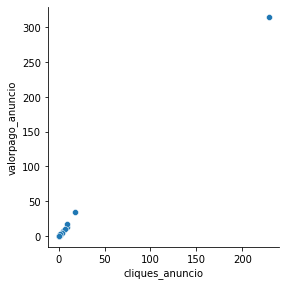

In [142]:
sns.pairplot(amostra_dt, x_vars=["cliques_anuncio"], y_vars=["valorpago_anuncio"], height=4, kind="scatter")
plt.show()

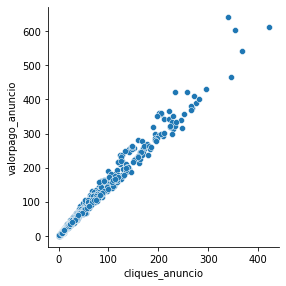

In [141]:
sns.pairplot(dt, x_vars=["cliques_anuncio"], y_vars=["valorpago_anuncio"], height=4, kind="scatter")
plt.show()

In [143]:
dt.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_anuncio,valorpago_anuncio,conversao,compras
0,708746,campanha-1,103916,0.0011,1,15,7350,1,1.43,2,1
1,708749,campanha-1,103917,0.0011,1,16,17861,2,1.82,2,0
2,708771,campanha-1,103920,0.0011,1,20,693,0,0.00,1,0
3,708815,campanha-1,103928,0.0011,1,28,4259,1,1.25,1,0
4,708818,campanha-1,103928,0.0011,1,28,4133,1,1.29,1,1


In [144]:
dt = dt.replace('30-34',0.0011) #Idade 30-34 renomeado como 0.0011
dt = dt.replace('35-39',0.0012) #Idade 35-39 renomeado como 0.0012
dt = dt.replace('40-44',0.0013) #Idade 40-44 renomeado como 0.0013
dt = dt.replace('45-49',0.0014) #Idade 45-49 renomeado como 0.0014

In [145]:
dt.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_anuncio,valorpago_anuncio,conversao,compras
0,708746,campanha-1,103916,0.0011,1,15,7350,1,1.43,2,1
1,708749,campanha-1,103917,0.0011,1,16,17861,2,1.82,2,0
2,708771,campanha-1,103920,0.0011,1,20,693,0,0.00,1,0
3,708815,campanha-1,103928,0.0011,1,28,4259,1,1.25,1,0
4,708818,campanha-1,103928,0.0011,1,28,4133,1,1.29,1,1


In [146]:
dt.tail()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_anuncio,valorpago_anuncio,conversao,compras
1138,1314410,campanha-3,179977,0.0014,0,109,1129773,252,358.189997,13,2
1139,1314411,campanha-3,179978,0.0014,0,110,637549,120,173.880003,3,0
1140,1314412,campanha-3,179979,0.0014,0,111,151531,28,40.289999,2,0
1141,1314414,campanha-3,179981,0.0014,0,113,790253,135,198.710000,8,2
1142,1314415,campanha-3,179982,0.0014,0,114,513161,114,165.609999,5,2


In [147]:
dt = dt.replace('M',1) #Gênero M renomeado como 1
dt = dt.replace('F',0) #Gênero F renomeado como 0

In [148]:
dt.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_anuncio,valorpago_anuncio,conversao,compras
0,708746,campanha-1,103916,0.0011,1,15,7350,1,1.43,2,1
1,708749,campanha-1,103917,0.0011,1,16,17861,2,1.82,2,0
2,708771,campanha-1,103920,0.0011,1,20,693,0,0.00,1,0
3,708815,campanha-1,103928,0.0011,1,28,4259,1,1.25,1,0
4,708818,campanha-1,103928,0.0011,1,28,4133,1,1.29,1,1


In [149]:
X = dt[['idade', 'genero', 'interesse', 'numero_exibicoes', 'cliques_anuncio']]

In [150]:
y = dt['valorpago_anuncio']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [152]:
X_train.shape

(800, 5)

In [153]:
X_test.shape

(343, 5)

In [154]:
X_train.head()

,idade,genero,interesse,numero_exibicoes,cliques_anuncio
1053,0.0011,1,107,496760,42
158,0.0011,1,64,792,0
445,0.0014,1,21,1909,1
328,0.0013,1,15,4414,0
636,0.0012,1,19,76355,9


In [155]:
y_train.head()

1053    61.009999
158      0.000000
445      0.980000
328      0.000000
636     14.630000
Name: valorpago_anuncio, dtype: float64

In [156]:
model = LinearRegression()

In [157]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
model.coef_

array([ 1.20231144e+04,  2.94469247e+00, -7.13940355e-02,  8.12807667e-05,
        1.09815975e+00])

In [160]:
model.intercept_

-14.252976722449418

In [ ]:
#y = ax + b

In [161]:
model.score(X_test, y_test) * 100

99.5540293821603

### Predição para Campanhas no Facebook

In [162]:
dt.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_anuncio,valorpago_anuncio,conversao,compras
0,708746,campanha-1,103916,0.0011,1,15,7350,1,1.43,2,1
1,708749,campanha-1,103917,0.0011,1,16,17861,2,1.82,2,0
2,708771,campanha-1,103920,0.0011,1,20,693,0,0.00,1,0
3,708815,campanha-1,103928,0.0011,1,28,4259,1,1.25,1,0
4,708818,campanha-1,103928,0.0011,1,28,4133,1,1.29,1,1


In [163]:
dt.tail()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_anuncio,valorpago_anuncio,conversao,compras
1138,1314410,campanha-3,179977,0.0014,0,109,1129773,252,358.189997,13,2
1139,1314411,campanha-3,179978,0.0014,0,110,637549,120,173.880003,3,0
1140,1314412,campanha-3,179979,0.0014,0,111,151531,28,40.289999,2,0
1141,1314414,campanha-3,179981,0.0014,0,113,790253,135,198.710000,8,2
1142,1314415,campanha-3,179982,0.0014,0,114,513161,114,165.609999,5,2


In [171]:
idade = float(input("Idade: "))
genero = int(input("Gênero: "))
interesse = int(input("Interesse: "))
numero_exibicoes = int(input("Exibições: "))
cliques_anuncio = int(input("Cliques: "))

Idade: 0.0011
Gênero: 1
Interesse: 28
Exibições: 8000
Cliques: 1


In [172]:
idade

0.0011

In [173]:
genero

1

In [174]:
pred = model.predict([[idade, genero, interesse, numero_exibicoes, cliques_anuncio]])

In [175]:
print(pred)

[1.66651445]
